<a href="https://colab.research.google.com/github/evangrinalds/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/LS_DS18_Unit_4_Sprint_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:** The component of the neural network that receives one or more inputs and sums them to produce an output.
- **Input Layer:** Composed of neurons at the very beginning of the workflow for the artificial neural network. 
- **Hidden Layer:** Placed in between the input and output layers. 
- **Output Layer:** Takes in the inputs which are passed in from the layers before it to produce the final output results. 
- **Activation Function:** Defines the output of that node given an input. (activation='sigmoid')

Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

In [ ]:
# Back propagation is the process of updating the weights and bias to improve accuracy

Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.

In [ ]:
# Perceptron is a single layer neural network and a multi-layer perceptron is called a Neural Network. 
# The neuron receives one or more inputs and sums them to produce an output.

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [ ]:
"""
Our Dataset
"""
import pandas as pd
import numpy as np

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

### Simple Perceptron
Construct a simple perceptron using Keras. You model should have 1 dense layer with a single neuron and a sigmoid activation function. Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 

In [ ]:
# Import keras classes
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()
model1.add(Dense(1, input_dim=2, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

h1 = model1.fit(X,y, epochs=10);

Epoch 1/10
10/10 [==============================] - 0s 2ms/step - loss: 0.9509 - accuracy: 0.4533
Epoch 2/10
10/10 [==============================] - 0s 1ms/step - loss: 0.9472 - accuracy: 0.4533
Epoch 3/10
10/10 [==============================] - 0s 1ms/step - loss: 0.9435 - accuracy: 0.4533
Epoch 4/10
10/10 [==============================] - 0s 1ms/step - loss: 0.9399 - accuracy: 0.4533
Epoch 5/10
10/10 [==============================] - 0s 1ms/step - loss: 0.9362 - accuracy: 0.4567
Epoch 6/10
10/10 [==============================] - 0s 1ms/step - loss: 0.9327 - accuracy: 0.4567
Epoch 7/10
10/10 [==============================] - 0s 1ms/step - loss: 0.9293 - accuracy: 0.4600
Epoch 8/10
10/10 [==============================] - 0s 1ms/step - loss: 0.9257 - accuracy: 0.4633
Epoch 9/10
10/10 [==============================] - 0s 1ms/step - loss: 0.9225 - accuracy: 0.4633
Epoch 10/10
10/10 [==============================] - 0s 1ms/step - loss: 0.9188 - accuracy: 0.4600


In [ ]:
# Evaluate the model
print('Model1 accuracy: ', model1.evaluate(X, y)[1]*100)

10/10 [==============================] - 0s 2ms/step - loss: 0.9167 - accuracy: 0.4600
Model1 accuracy:  46.00000083446503


### Multi-Layer Perceptron
Now construct a multi-layer perceptron using. Here are some architecture suggestions: 
- 2 Hidden Layers
- 5-32 Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the Callback function below into your model

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. 

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .99999):   
            self.model.stop_training = True

In [ ]:
# model2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def create_model(lr=.01):
  opt = SGD(learning_rate=lr)

  model2 = Sequential(
      [
       Dense(32, activation='relu', input_dim=2),
       Dense(32, activation='relu'),
       Dense(1, activation='sigmoid')       
      ]
)
  model2.compile(optimizer=opt, loss='binary_crossentropy',
                metrics=['accuracy'])
  return model2

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                      random_state=42)

In [ ]:
model2 = create_model()

h2 = model2.fit(X_train, y_train, 
                             epochs=25, 
                             batch_size=32, 
                             validation_data=(X_test, y_test))

Epoch 1/25
7/7 [==============================] - 0s 19ms/step - loss: 0.7048 - accuracy: 0.4524 - val_loss: 0.7082 - val_accuracy: 0.3556
Epoch 2/25
7/7 [==============================] - 0s 4ms/step - loss: 0.7023 - accuracy: 0.4619 - val_loss: 0.7065 - val_accuracy: 0.3667
Epoch 3/25
7/7 [==============================] - 0s 4ms/step - loss: 0.6998 - accuracy: 0.4762 - val_loss: 0.7048 - val_accuracy: 0.3778
Epoch 4/25
7/7 [==============================] - 0s 6ms/step - loss: 0.6974 - accuracy: 0.4952 - val_loss: 0.7033 - val_accuracy: 0.3778
Epoch 5/25
7/7 [==============================] - 0s 4ms/step - loss: 0.6951 - accuracy: 0.4952 - val_loss: 0.7017 - val_accuracy: 0.3778
Epoch 6/25
7/7 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5048 - val_loss: 0.7003 - val_accuracy: 0.3778
Epoch 7/25
7/7 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.5143 - val_loss: 0.6988 - val_accuracy: 0.3778
Epoch 8/25
7/7 [=================

In [ ]:
# Evaluate the model
print('Model2 accuracy: ', model2.evaluate(X, y)[1]*100)

10/10 [==============================] - 0s 1ms/step - loss: 0.6610 - accuracy: 0.6167
Model2 accuracy:  61.666667461395264


In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


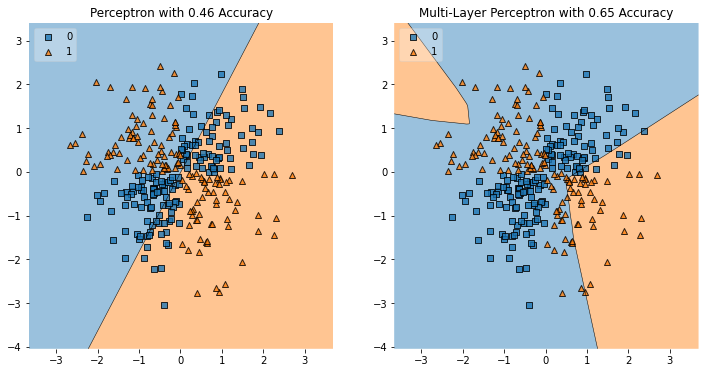

In [ ]:
# Do Not change anything in this cell

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?

In [ ]:
# The Perceptron achieves limited accuracy because it only has one input/outputs, no hidden layers. 
# The Multi-Layer Perceptron (Neural Network) uses "Back Propogation" to update the weights and bias in order to get a better accuracy rating.

## 3. Keras MMP <a id="Q3"></a>



*   Implement a Multilayer Perceptron architecture of your choosing using the Keras 
library.
*   Train your model and report its baseline accuracy.
*   Then hyperparameter tune at least two parameters and report your model's accuracy.
*   Use the Heart Disease Dataset (binary classification)
*   Use an appropriate loss function for a binary classification task.
*   Use an appropriate activation function on the final layer of your network.
*   Train your model using verbose output for ease of grading.
*   Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
*   When hyperparameter tuning, show you work by adding code cells for each new experiment.
*   Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy. 
*   You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.


In [ ]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
# Use the Heart Disease Dataset (binary classification)
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3,0
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2,1
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


In [ ]:
# Implement a Multilayer Perceptron architecture of your choosing using the Keras library.

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

def create_model(lr=.01):
  opt = SGD(learning_rate=lr)

  model3 = Sequential(
      [
       Dense(32, activation='relu', input_dim=2),
       Dense(32, activation='relu'),
       Dense(1, activation='sigmoid')       
      ]
)
  model3.compile(optimizer=opt, loss='binary_crossentropy',
                metrics=['accuracy'])
  return model3

In [ ]:
# Train your model
model3 = create_model()

bt_normal = model3.fit(X, y, 
                       epochs=25, 
                       batch_size=32, 
                       validation_data=(X, y))

Epoch 1/25
10/10 [==============================] - 0s 15ms/step - loss: 0.7242 - accuracy: 0.3133 - val_loss: 0.7163 - val_accuracy: 0.3133
Epoch 2/25
10/10 [==============================] - 0s 4ms/step - loss: 0.7116 - accuracy: 0.3167 - val_loss: 0.7046 - val_accuracy: 0.3167
Epoch 3/25
10/10 [==============================] - 0s 4ms/step - loss: 0.7007 - accuracy: 0.3467 - val_loss: 0.6949 - val_accuracy: 0.3800
Epoch 4/25
10/10 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.4067 - val_loss: 0.6871 - val_accuracy: 0.4367
Epoch 5/25
10/10 [==============================] - 0s 4ms/step - loss: 0.6842 - accuracy: 0.4500 - val_loss: 0.6798 - val_accuracy: 0.4833
Epoch 6/25
10/10 [==============================] - 0s 4ms/step - loss: 0.6773 - accuracy: 0.4867 - val_loss: 0.6733 - val_accuracy: 0.5100
Epoch 7/25
10/10 [==============================] - 0s 4ms/step - loss: 0.6709 - accuracy: 0.5267 - val_loss: 0.6673 - val_accuracy: 0.5333
Epoch 8/25
10/10 [=

In [ ]:
# Report baseline accuracy. 
print('Model3 accuracy: ', model3.evaluate(X, y)[1]*100)

10/10 [==============================] - 0s 1ms/step - loss: 0.5895 - accuracy: 0.8467
Model3 accuracy:  84.6666693687439


In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import numpy
import pandas as pd
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model3 = Sequential()
    model3.add(Dense(32, input_dim=2, activation='relu'))
    model3.add(Dense(2, activation='softmax'))
    # Compile model
    model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model3

# create model
model3 = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
param_grid = {'batch_size': [10, 20, 40, 60, 80, 100],
              'epochs': [20, 40]}

# Create Grid Search
grid = GridSearchCV(estimator=model3, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.9766666650772095 using {'batch_size': 10, 'epochs': 40}
Means: 0.949999988079071, Stdev: 0.033333337306978454 with: {'batch_size': 10, 'epochs': 20}
Means: 0.9766666650772095, Stdev: 0.024944384277698226 with: {'batch_size': 10, 'epochs': 40}
Means: 0.9266666650772095, Stdev: 0.019999996821093508 with: {'batch_size': 20, 'epochs': 20}
Means: 0.9699999928474426, Stdev: 0.022110834212096638 with: {'batch_size': 20, 'epochs': 40}
Means: 0.8800000071525573, Stdev: 0.06091890065366994 with: {'batch_size': 40, 'epochs': 20}
Means: 0.9299999833106994, Stdev: 0.04000000953674317 with: {'batch_size': 40, 'epochs': 40}
Means: 0.8200000047683715, Stdev: 0.06699917452416175 with: {'batch_size': 60, 'epochs': 20}
Means: 0.8766666650772095, Stdev: 0.038873011337502934 with: {'batch_size': 60, 'epochs': 40}
Means: 0.800000011920929, Stdev: 0.08628120386193966 with: {'batch_size': 80, 'epochs': 20}
Means: 0.8933333277702331, Stdev: 0.05637177169439648 with: {'batch_size': 80, 'epochs': 40}
Mea